In [1]:
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.1.0-dlenv_tfe
tensorboard2.1.1
seaborn0.10.0
Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8492183334944857091,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14252424767190442298
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16892302595066406820
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14728907981
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4379894140040150792
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir="../input/kaggle-catsdogs"
test_path= os.path.join(data_dir, 'test')
train_path= os.path.join(data_dir, 'train')
os.listdir(train_path)

['dogs', 'cats']

In [3]:

cat_image = train_path + '/cats/' + os.listdir(train_path + '/cats')[0]
imread(cat_image).shape
# plt.imshow(imread(cat_image))

(325, 252, 3)

'../input/kaggle-catsdogs/train/dogs/dog.4550.jpg'

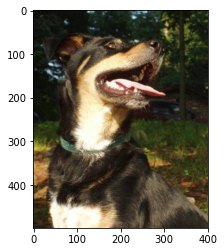

In [4]:
dog_image = train_path + '/dogs/' + os.listdir(train_path + '/dogs/')[5]
plt.imshow(imread(dog_image))
dog_image

In [5]:
# len(os.listdir(train_path + '/dogs'))

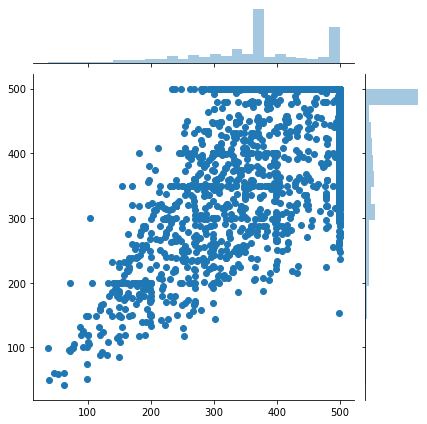

In [6]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path + '/dogs/'):
    img = imread(test_path+'/dogs/' + image_filename)
#     print (train_path+'\\dogs\\' + image_filename)
    d1,d2, _ = img.shape
    dim1.append(d1)
    dim2.append(d2)
sns.jointplot(dim1, dim2)

In [7]:
# np.mean(dim2)
# imread(dog_image).shape
image_shape =(300, 300, 3)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, rescale =1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')
test_gen = ImageDataGenerator(rescale =1./255)

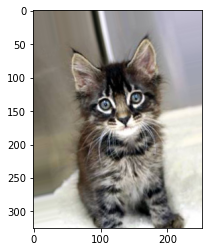

In [9]:
plt.imshow(imread(cat_image))
cat_image
plt.imshow(train_gen.random_transform(imread(cat_image)))

In [10]:
# image_gen.flow_from_directory(train_path)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
batch_size=32

train_image_gen= train_gen.flow_from_directory(train_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary')

test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary')

train_image_gen.class_indices

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten


import keras_resnet.models
import keras

# x = keras.layers.Input(image_shape)
# base_model = keras_resnet.models.ResNet50(x, classes=1)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())


# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D, BatchNormalization
# from keras.models import Sequential,Model,load_model
# from keras import applications




# model = Sequential()

# model.add(applications.ResNet50(include_top=False, pooling=None, input_shape=image_shape))
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(1, activation='sigmoid'))

# model.layers[0].trainable = False



# base_model = applications.ResNet152V2(weights= None, include_top=False, input_shape= image_shape)
# x = base_model.output
# # x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)
# x = Dense(1024, activation = 'relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(1, activation= 'sigmoid')(x)
# model = Model(inputs = base_model.input, outputs = predictions)

from tensorflow.keras.optimizers import SGD, Adam
opt = Adam(lr=0.0001)
# opt = SGD(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

results = model.fit_generator(train_image_gen, epochs=100, verbose = 1, validation_data=test_image_gen, callbacks=[early_stop])

Using TensorFlow backend.


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 157 steps
Epoch 1/100
625/625 [==============================] - 516s 825ms/step - loss: 0.6774 - accuracy: 0.5574 - val_loss: 0.6017 - val_accuracy: 0.6748
Epoch 2/100
625/625 [==============================] - 407s 651ms/step - loss: 0.5982 - accuracy: 0.6831 - val_loss: 0.5584 - val_accuracy: 0.7270
Epoch 3/100
625/625 [==============================] - 410s 656ms/step - loss: 0.5369 - accuracy: 0.7324 - val_loss: 0.4642 - val_accuracy: 0.7788
Epoch 4/100
625/625 [==============================] - 415s 664ms/step - loss: 0.4972 - accuracy: 0.7627 - val_loss: 0.4374 - val_accuracy: 0.7960
Epoch 5/100
625/625 [==============================] - 415s 663ms/step - loss: 0.4674 - accuracy: 0.7829 - val_loss: 0.4096 - val_accuracy: 0.8118
Epoch 6/100
625/625 [==============================] - 409s 654ms/step - loss: 0.4427 - accurac

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0

In [30]:
model.save('catsdogs')

INFO:tensorflow:Assets written to: catsdogs/assets


In [73]:
import pandas as pd

pd.DataFrame.from_dict(results.history).to_csv('history_catsdogs.csv',index=False)

In [77]:
history_dict = pd.read_csv("history_catsdogs.csv")

AttributeError: 'str' object has no attribute 'get'

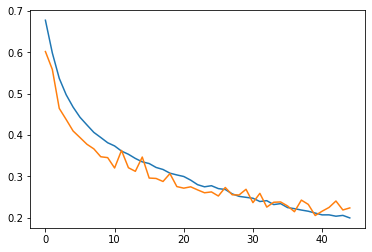

In [79]:
plt.plot(history_dict['loss'])
plt.plot(history['val_loss'])

In [19]:
model.evaluate_generator(train_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.18087134101986885, 0.9276]

In [82]:
pred = model.predict(train_image_gen)

In [83]:
predictions = pred > 0.5

In [22]:
pred
len(pred)

20000

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(test_image_gen.classes, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [5000, 20000]

In [ ]:
confusion_matrix(test_image_gen.classes, predictions)

In [ ]:
dog_image

In [ ]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(dog_image, target_size=image_shape)
my_image

In [ ]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape

In [ ]:
my_img_arr = np.expand_dims(my_img_arr, axis =0)
my_img_arr.shape

In [ ]:
model.predict(my_img_arr)

In [ ]:
# ! pip install keras-resnet